
# Recommendation system - Collaborative Filtering

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [3]:
product_path = "Final data/products.csv"
reviews_path = "Final data/reviews.csv"
category_path = "Final data/category.csv"
train_path = "Final data/train.csv"

Reading the data after making then csv files is easy

# Reading Product Data

In [4]:
products = pd.read_csv(product_path)

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721771 entries, 0 to 1721770
Data columns (total 13 columns):
Unnamed: 0        int64
Unnamed: 0.1      float64
aboutMe           object
comment           object
id                float64
name              object
productId         float64
rating            float64
review            float64
reviewer          object
sku               int64
submissionTime    object
title             object
dtypes: float64(5), int64(2), object(6)
memory usage: 170.8+ MB


In [6]:
print(products.isnull().sum())
products.drop(['Unnamed: 0', 'Unnamed: 0.1', 'aboutMe', 
               'comment', 'id', 'rating', 'review', 
               'reviewer', 'submissionTime','title','productId'],axis = 1,inplace=True)
products.head()

Unnamed: 0        0      
Unnamed: 0.1      1471771
aboutMe           1721764
comment           1500002
id                1500000
name              221771 
productId         221771 
rating            1500000
review            1721771
reviewer          1500000
sku               0      
submissionTime    1500000
title             1500005
dtype: int64


,name,sku
0,Christmas Island - CD,10359694
1,Stellar Pieces - CD,10359701
2,Trumpet Experience - CD,10359729
3,The Shazam - CD,10359738
4,Rewriting the Wrongs - CD,10359747


# Reading reviews data

In [7]:
reviews = pd.read_csv(reviews_path)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221771 entries, 0 to 221770
Data columns (total 11 columns):
Unnamed: 0        221771 non-null int64
review            0 non-null float64
id                221771 non-null int64
sku               221771 non-null int64
reviewer          221771 non-null object
name              0 non-null float64
aboutMe           7 non-null object
rating            221771 non-null float64
title             221766 non-null object
comment           221769 non-null object
submissionTime    221771 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 18.6+ MB


In [8]:
reviews.drop(['Unnamed: 0','review','name','aboutMe','submissionTime','id','reviewer','title','comment'],axis = 1,inplace=True)
reviews.head()

,sku,rating
0,8149167,5.0
1,8487032,5.0
2,8381538,4.0
3,6287804,4.0
4,4307084,4.0


# Reading Category Data 

In [9]:
categories = pd.read_csv(category_path)


In [10]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 3 columns):
Unnamed: 0    4640 non-null int64
id            4640 non-null object
name          4640 non-null object
dtypes: int64(1), object(2)
memory usage: 108.8+ KB


In [11]:
categories.drop("Unnamed: 0",axis= 1,inplace = True)


# Reading Train data

In [12]:
train = pd.read_csv(train_path)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865269 entries, 0 to 1865268
Data columns (total 6 columns):
user          object
sku           int64
category      object
query         object
click_time    object
query_time    object
dtypes: int64(1), object(5)
memory usage: 85.4+ MB


In [13]:
# train.head(2)

In [14]:
train = train.drop(['query','click_time','query_time'],axis = 1)

# Prepare data for Analysis

In [15]:
part_1 = train.drop_duplicates(subset = ['user','sku','category'])
part_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862827 entries, 0 to 1865268
Data columns (total 3 columns):
user        object
sku         int64
category    object
dtypes: int64(1), object(2)
memory usage: 56.8+ MB


In [16]:
#adding Category name from category table
part_2 = pd.merge(part_1,categories,how = 'inner',left_on='category',right_on='id')
part_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852563 entries, 0 to 1852562
Data columns (total 5 columns):
user        object
sku         int64
category    object
id          object
name        object
dtypes: int64(1), object(4)
memory usage: 84.8+ MB


In [17]:
part_2.rename(columns={'name':'cat_name'}, inplace=True)
part_2 = part_2.drop(['id','category'],axis =1)
part_2 = part_2.set_index('sku')

In [18]:
#adding product name from products table
products.set_index('sku',inplace=True)

In [19]:
x = products.dropna()
x.sort_index().head(10)
x.shape
y =x.index

In [20]:
part_4 = part_2.join(x,how = 'inner')
part_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088727 entries, 7873063 to 19709208
Data columns (total 3 columns):
user        1088727 non-null object
cat_name    1088727 non-null object
name        1088727 non-null object
dtypes: object(3)
memory usage: 33.2+ MB


In [21]:
print(part_4.isna().sum())
part_4.head()

user        0
cat_name    0
name        0
dtype: int64


,user,cat_name,name
sku,,,
7873063,d6add0a136e569353efd3dcc7689b01faa4fbcef,Movies & TV Shows,Johnny Cash: Man in Black - Live in Denmark 1971 - DVD
7873063,d6add0a136e569353efd3dcc7689b01faa4fbcef,Movies & TV Shows,Johnny Cash: Man in Black - Live in Denmark 1971 - DVD
7873081,a210e86ce7741e5e4f5e7450161b158b09c3ef9c,Movies & TV Shows,The Clash: Rude Boy - DVD
7873081,a210e86ce7741e5e4f5e7450161b158b09c3ef9c,Movies & TV Shows,The Clash: Rude Boy - DVD
7873125,10beae2f3b62b3a1d30fbf16477b259a12ff049e,Children's,Groove to the Music - Various - CD


# EDA

Let's explore the data a bit and get a look at some of the best rated Products.

In [22]:
reviews.head()

,sku,rating
0,8149167,5.0
1,8487032,5.0
2,8381538,4.0
3,6287804,4.0
4,4307084,4.0


In [23]:
sku_rat = pd.DataFrame(reviews.groupby('sku')['rating'].mean())
sku_rat['num of ratings'] = pd.DataFrame(reviews.groupby('sku')['rating'].count())
sku_rat.head()

,rating,num of ratings
sku,,
48530,4.5,2
127687,5.0,5
150115,3.0,2
185267,5.0,1
312290,5.0,1


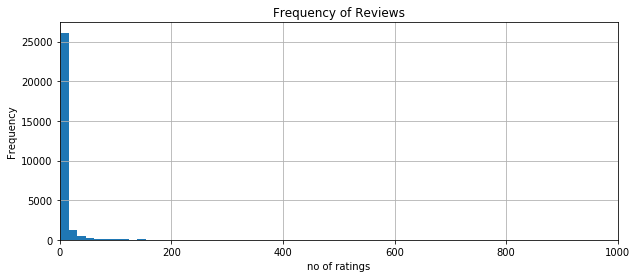

In [24]:
plt.figure(figsize=(10,4))
sku_rat['num of ratings'].hist(bins=70)
plt.xlim(0,1000)
plt.xlabel('no of ratings')
plt.ylabel('Frequency')
plt.title('Frequency of Reviews')
plt.show()

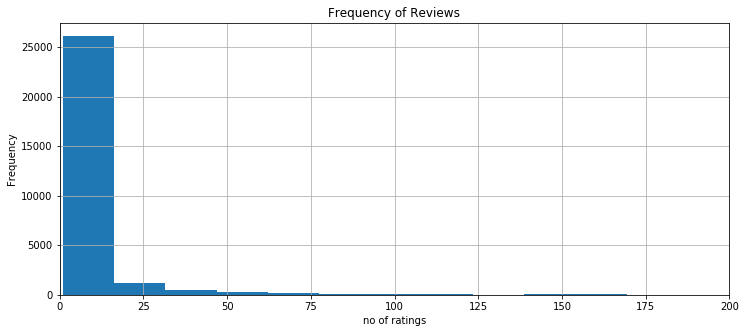

In [25]:
plt.figure(figsize=(12,5))
sku_rat['num of ratings'].hist(bins=70)
plt.xlim(0,200)
plt.xlabel('no of ratings')
plt.ylabel('Frequency')
plt.title('Frequency of Reviews')
plt.show()

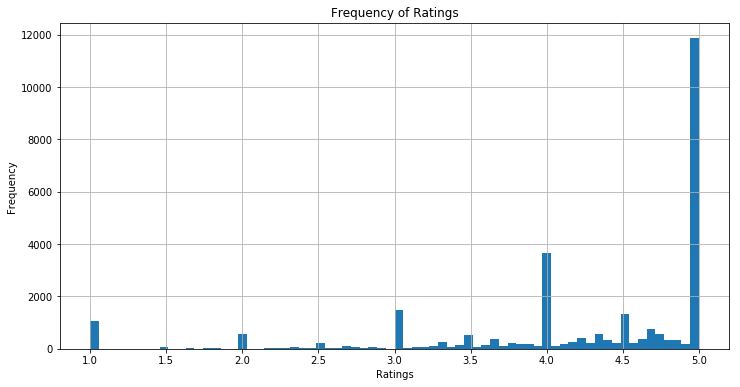

In [26]:
plt.figure(figsize=(12,6))
sku_rat['rating'].hist(bins=70)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Frequency of Ratings')
plt.show()

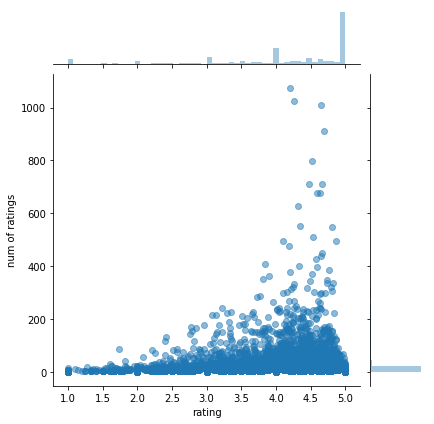

In [27]:
sns.jointplot(x='rating',y='num of ratings',data=sku_rat,alpha=0.5)
plt.show()

In [28]:
#most popular items
item_freq = pd.DataFrame(part_4.groupby('name')['name'].count())
item_freq.columns = ['freqs']
item_freq = item_freq.reset_index()
item_freq = item_freq.sort_values('freqs',ascending = False)

In [29]:
x = item_freq.name.head(20)
y=item_freq.freqs.head(20)

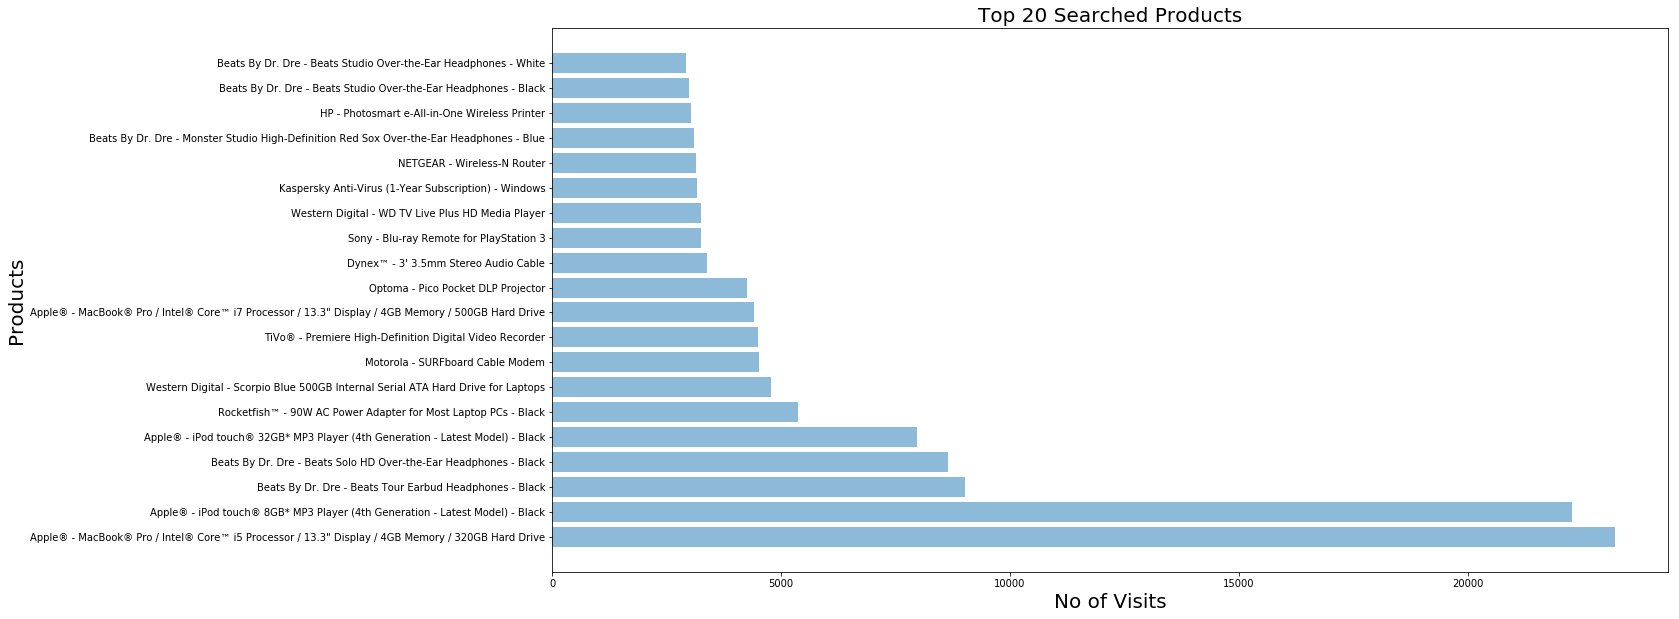

In [30]:
plt.figure(figsize = (20,10))
plt.barh(x,y , align='center', alpha=0.5)
plt.ylabel('Products',fontsize=20)
plt.xlabel('No of Visits',fontsize=20)
plt.title('Top 20 Searched Products',fontsize=20)
plt.show()

# Lets Do Some Recommendations

## Filtering some less famous products

In [31]:
merged = part_4.copy()
merged = merged.reset_index()

#filtering some less famous products
x = pd.DataFrame(merged.sku.value_counts())
x = x[x.sku>=200]
x.columns = ['ct']

#innerjoin with only famous skus
merged = merged.set_index('sku')
merged = merged.join(x,how = 'inner')
merged = merged.reset_index()

merged=merged.drop(['ct'],axis = 1)
merged.columns = ['sku','user','cat_name','name']
merged.head(2)

,sku,user,cat_name,name
0,7897001,008de87c3a54a31701557d82cea9eb4ef2eec949,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver
1,7897001,008de87c3a54a31701557d82cea9eb4ef2eec949,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver


In [32]:
merged['flag'] = 1
merged.head()

,sku,user,cat_name,name,flag
0,7897001,008de87c3a54a31701557d82cea9eb4ef2eec949,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1
1,7897001,008de87c3a54a31701557d82cea9eb4ef2eec949,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1
2,7897001,010461547b74e04bdb900c3a612ad7df3a70168f,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1
3,7897001,010461547b74e04bdb900c3a612ad7df3a70168f,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1
4,7897001,0616cb5e8b94040fb1c0506e0d98e266b0450fdd,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1


In [33]:
merged.drop_duplicates(subset = ['sku','user','name','flag'],inplace=True)
merged.shape

(329148, 5)

In [34]:
merged.to_csv("merged.csv",index=False)

# Create User Item Sparse matrix 

In [35]:
R_df = merged.pivot_table(index='user',columns='sku',aggfunc = 'sum').fillna(0)
R_df.columns = R_df.columns.droplevel()
R_df.head()

sku,7897001,7903227,7918177,7933686,7934658,7942845,7945361,7956599,7960986,7968773,...,18850273,18963072,19046802,19057371,19439981,19440021,19440049,19486684,19493508,19550991
user,,,,,,,,,,,,,,,,,,,,,
00003cb3f85244c652f22c1daf11aed35d5ab7f6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000776d7bf35b984ca8e3671327a7ac1d07a86c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000126150c17acb66664a42c47d5dba399311783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00014aac7ef84270dab58af1c92b79685b89b9b9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00016ac345cf3220c4f56855d7021693290796c2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
R_df.shape

(271937, 976)

In [790]:
(R_df == 0).sum(axis=1).sum()


265081364

In [800]:
print('Shape of Sparse Matrix: ', R_df.shape)
print('Amount of Zero occurrences: ', (R_df == 0).sum(axis=1).sum())
# Percentage of zero values
density = (100.0 * (1-((R_df == 0).sum(axis=1).sum()) / (R_df.shape[0] * R_df.shape[1])))
density
print('density: {}'.format(density))

Shape of Sparse Matrix:  (271937, 976)
Amount of Zero occurrences:  265081364
density: 0.1240146810763898


# Collaborative filtering 
    ## 1. User Based      
    ## 2. Item Based
   
     # Model Based - using matrix factorization
     + SVD
     + SVDpp
     + NMF
       - Similarity Based - using sparse matrix
         + pearson - Correlation 
         + cosine similarity

### User Based, Using Sparse matrix - pearson correlation
lets choose 2 users to see recommendations

In [37]:
#Transpoing the matrix for user based columns
R_df_trans = R_df.transpose()
R_df_trans.head(2)

user,00003cb3f85244c652f22c1daf11aed35d5ab7f6,0000776d7bf35b984ca8e3671327a7ac1d07a86c,000126150c17acb66664a42c47d5dba399311783,00014aac7ef84270dab58af1c92b79685b89b9b9,00016ac345cf3220c4f56855d7021693290796c2,000189195b3b3b0a4a02cd61d600aaa13fa01132,00018bd07703a3d9040ae56de3f9417edc043385,0001be1731ee7d1c519bc7e87110c9eb880cb396,0001e8bb4ac9af004b09530c7b5a9392f8e46280,00020d2c7f5d428383decea4ad087f414a2b60cb,...,fffd7c957f43567ebc6f50f8cf84b172b70867a2,fffda95cc59a80e92beed962d506f0885691d9ab,fffdd33c42a3e23efc2c2ffc54563b140af205b1,fffddc6e7462f94c438f7d328b65fcc6ce3302e5,fffe3e08fec77102c978ff24552d4f66abdb30a5,fffe45775451e2aefadbbc6b1d646d742097e12c,fffedfb154fbc4107ba7b075e4e1772a5a0cb20b,fffee392fe085ba6ee49a128942dc7e30d561c12,fffee4707784b8be3219bcd34e375811bb020e9d,ffff264f38f0f3cb7c3e45135bdd8bdaa4e6d2d8
sku,,,,,,,,,,,,,,,,,,,,,
7897001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7903227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# df = pd.DataFrame(merged.user.value_counts())
# df[df.user>=2].sort_values(by = 'user')

In [185]:
user1 = "889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898"
user2 = "e93d81ed71a34bf33b61a4bc0cd2a486d73da2d2"

#selecting user data 
user1_rat = R_df_trans.loc[:,user1]
user2_rat = R_df_trans.loc[:,user2]

In [186]:
def Similar_users_pearson (user_rating):
    users_similer_to_user = R_df_trans.corrwith(user_rating)
    corr_tab = pd.DataFrame(users_similer_to_user,columns=['Correlation'])
    corr_tab.dropna(inplace=True)
    corr_tab=corr_tab.sort_values('Correlation',ascending=False).reset_index()
    return corr_tab

In [187]:
users_similer_to_user1 = Similar_users_pearson(user1_rat)
users_similer_to_user1.head()

,user,Correlation
0,889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898,1.000000
1,050ea239d38e11d097eb62835baa1e9622b4e06c,0.665639
2,3c6d2056a593a944ca9170c34feca7e0efe38d88,0.576758
3,e29eb6d24e001125625913e58149ff2e264d8abd,0.576758
4,04f5e5a20bcf5f203c035a7c5aa3409715e7f3c6,0.576758


In [188]:
users_similer_to_user2 = Similar_users_pearson(user2_rat)
users_similer_to_user2.head()

,user,Correlation
0,e93d81ed71a34bf33b61a4bc0cd2a486d73da2d2,1.000000
1,e42ce17bb015788d29fc88662d8efccf02c0d3f9,0.816077
2,6cc4c0551470c62c323e3520fb30ea4063ed0ea8,0.816077
3,8b1d9d6303c98fa9ce6209c2593182c91cb182da,0.816077
4,af8e18940703c3a62859440927da5549163e12fa,0.816077


### user 1 Analysis

- Lets take few nearest users to user 1 

In [167]:
def recommendations(n_near_users,user,similar_to_user_data):
    alreadyviewd = merged[merged['user'] == user].name.unique()
    rec_dict={}
    for i in range(1,n_near_users+1):
        similati = similar_to_user_data['user'][i]
        reci =  merged[merged['user'] == similati].name.unique()
        for rec in reci:
            if rec in rec_dict:
                rec_dict[rec] = rec_dict[rec]+1
            else:
                rec_dict[rec] = 1            
    rec_list=[]
    for i in rec_dict.keys():
        if i not in alreadyviewd:
            rec_list.append(i) 
    return rec_list,alreadyviewd,rec_dict

In [44]:
rec_list,alreadyviewd,rec_dict = recommendations(250,user1,users_similer_to_user1)

In [97]:
print("Already viewed items: "+ "\n"+ str(pd.DataFrame(alreadyviewd)) + "\n")
print("Viewed by other users - unique items: "+"\n"+ str(pd.DataFrame(list(rec_dict.keys())))+'\n')
print("Recommended list of items: "+"\n" + str(pd.DataFrame(rec_list))+"\n")

Already viewed items: 
                                                                            0
0  Bose® - SoundDock® Series II Digital Music System for Apple® iPod® - Black
1  Klipsch - Image S4 Earbud Headphones                                      
2  Altec Lansing - Mix Digital Boombox for Apple® iPhone and iPod® - Black   

Viewed by other users - unique items: 
                                                                            0
0  Bose® - SoundDock® Series II Digital Music System for Apple® iPod® - Black
1  Altec Lansing - Mix Digital Boombox for Apple® iPhone and iPod® - Black   
2  Klipsch - Image S4 Earbud Headphones                                      
3  Bose® - SoundDock® Portable Digital Music System for Apple® iPod® - Black 

Recommended list of items: 
                                                                           0
0  Bose® - SoundDock® Portable Digital Music System for Apple® iPod® - Black



### user 2 Analysis

In [46]:
rec_list,alreadyviewd,rec_dict = recommendations(5,user2,users_similer_to_user2)

In [47]:
print("Already viewed items: "+ "\n"+ str(alreadyviewd) + "\n")
print("Viewed by other users - unique items: "+"\n"+ str(rec_dict)+ "\n")
print("Recommended list of items: "+"\n" + str(rec_list)+"\n")

Already viewed items: 
['Bose® - SoundDock® Series II Digital Music System for Apple® iPod® - Black'
 'Klipsch - Image S4 Earbud Headphones'
 'Altec Lansing - Mix Digital Boombox for Apple® iPhone and iPod® - Black']

Viewed by other users - unique items: 
{'Bose® - SoundDock® Series II Digital Music System for Apple® iPod® - Black': 5, 'Altec Lansing - Mix Digital Boombox for Apple® iPhone and iPod® - Black': 4, 'Klipsch - Image S4 Earbud Headphones': 1, 'Bose® - SoundDock® Portable Digital Music System for Apple® iPod® - Black': 1}

Recommended list of items: 
['Bose® - SoundDock® Portable Digital Music System for Apple® iPod® - Black']



### User Based, Using Sparse matrix - Cosine similarity
lets choose 2 users to see recommendations

In [48]:
#Create a dummy ratings matrix with all null values imputed to 0
r_matrix_dummy = R_df.copy()

In [49]:
user1 = "889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898"
user2 = "e93d81ed71a34bf33b61a4bc0cd2a486d73da2d2"
#selecting user data 
user_rat = r_matrix_dummy.loc[[user1,user2]]

In [50]:
user_rat

sku,7897001,7903227,7918177,7933686,7934658,7942845,7945361,7956599,7960986,7968773,...,18850273,18963072,19046802,19057371,19439981,19440021,19440049,19486684,19493508,19550991
user,,,,,,,,,,,,,,,,,,,,,
889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e93d81ed71a34bf33b61a4bc0cd2a486d73da2d2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# Import cosine_score 
from sklearn.metrics.pairwise import cosine_similarity

#Compute the cosine similarity matrix using the ratings matrix
# cosine_sim = cosine_similarity(r_matrix_dummy,user_rat)
cosine_sim1 = cosine_similarity(r_matrix_dummy,r_matrix_dummy.loc[[user1]])

In [52]:
user1_rat.shape

(976,)

In [53]:
#Convert into pandas dataframe 
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix_dummy.index, columns=user_rat.index)
print(cosine_sim.sum())
cosine_sim.head()

user
889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898    465.464611
e93d81ed71a34bf33b61a4bc0cd2a486d73da2d2    656.213823
dtype: float64


user,889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898,e93d81ed71a34bf33b61a4bc0cd2a486d73da2d2
user,,
00003cb3f85244c652f22c1daf11aed35d5ab7f6,0.0,0.0
0000776d7bf35b984ca8e3671327a7ac1d07a86c,0.0,0.0
000126150c17acb66664a42c47d5dba399311783,0.0,0.0
00014aac7ef84270dab58af1c92b79685b89b9b9,0.0,0.0
00016ac345cf3220c4f56855d7021693290796c2,0.0,0.0


### user 1 Analysis
- Lets take few nearest users to user 1 

In [54]:
similar_to_user1 = cosine_sim[user1].sort_values(ascending = False).reset_index()

In [55]:
similar_to_user1.head()

,user,889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898
0,889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898,1.000000
1,050ea239d38e11d097eb62835baa1e9622b4e06c,0.666667
2,0cb341bb3eed19536367fa7c88dd20c82c40e550,0.577350
3,9e3d25835122bab061cc5c683bd9ed8387503828,0.577350
4,d8ac7d22e57e03ca6322aac5d751127918c534d1,0.577350


In [57]:
rec_list,alreadyviewd,rec_dict = recommendations(10,user1,similar_to_user1)
print("Already viewed items: "+ "\n"+ str(alreadyviewd) + "\n\n")
print("Viewed by other users - unique items: "+"\n"+ str(rec_dict)+"\n\n")
print("Recommended list of items: "+"\n" + str(rec_list)+"\n")

Already viewed items: 
['Best Buy GC - $100 Gift Card' 'SanDisk - Cruzer 4GB USB 2.0 Flash Drive'
 'Lowepro - Navi Plus Camera Case and GPS Pouch - Black']


Viewed by other users - unique items: 
{'Best Buy GC - $100 Gift Card': 2, 'Smart Choice - Stainless-Steel Refrigerator Water Line Kit - Silver': 1, 'SanDisk - Cruzer 4GB USB 2.0 Flash Drive': 5, 'Lowepro - Navi Plus Camera Case and GPS Pouch - Black': 4}


Recommended list of items: 
['Smart Choice - Stainless-Steel Refrigerator Water Line Kit - Silver']



### user 2 Analysis
- Lets take few nearest users to user 2

In [58]:
similar_to_user2 = cosine_sim[user2].sort_values(ascending = False).reset_index()

In [59]:
rec_list,alreadyviewd,rec_dict = recommendations(100,user2,similar_to_user2)
print("Already viewed items: "+ "\n"+ str(alreadyviewd) + "\n\n")
print("Viewed by other users - unique items: "+"\n"+ str(rec_dict)+"\n\n")
print("Recommended list of items: "+"\n" + str(rec_list)+"\n")

Already viewed items: 
['Bose® - SoundDock® Series II Digital Music System for Apple® iPod® - Black'
 'Klipsch - Image S4 Earbud Headphones'
 'Altec Lansing - Mix Digital Boombox for Apple® iPhone and iPod® - Black']


Viewed by other users - unique items: 
{'Bose® - SoundDock® Series II Digital Music System for Apple® iPod® - Black': 30, 'Altec Lansing - Mix Digital Boombox for Apple® iPhone and iPod® - Black': 24, 'Klipsch - Image S4 Earbud Headphones': 51, 'Bose® - SoundDock® Portable Digital Music System for Apple® iPod® - Black': 1}


Recommended list of items: 
['Bose® - SoundDock® Portable Digital Music System for Apple® iPod® - Black']



# Model Based Collaborative filtering 

In [770]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [771]:
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df( merged[['user', 'name', 'flag']], reader)

With the Surprise library, we will benchmark the following algorithms

# Matrix Factorization-based algorithms

#### SVD

* SVD algorithm is equivalent to Probabilistic Matrix Factorization (http://papers.nips.cc/paper/3208-probabilistic-matrix-factorization.pdf)

#### SVDpp

* The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

#### NMF

* NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.


We use rmse as our accuracy metric for the predictions.

In [772]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), NMF()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

In [773]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [774]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.008484,39.694466,1.526751
SVD,0.016601,21.993636,1.511943
NMF,0.097915,52.416549,1.346666


SVDpp algorithm gave us the best rmse, therefore, we will proceed further with SVDpp.

In [103]:
algo = SVDpp(n_factors=20,
    n_epochs=20,
    init_mean=0,
    init_std_dev=0.1,
    lr_all=0.007,
    reg_all=0.02,random_state = 0)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

{'test_rmse': array([0.00867773, 0.00841092, 0.00824231]),
 'fit_time': (41.82793402671814, 39.34256720542908, 38.99308228492737),
 'test_time': (1.7675001621246338, 1.771986961364746, 1.7482669353485107)}

We use the train_test_split() to sample a trainset and a testset with given sizes, and use the accuracy metric of rmse. We’ll then use the fit() method which will train the algorithm on the trainset, and the test() method which will return the predictions made from the testset

In [104]:
trainset, testset = train_test_split(data, test_size=0.25,random_state=0)

In [105]:
algo = SVDpp(n_factors=20,
    n_epochs=20,
    init_mean=0,
    init_std_dev=0.1,
    lr_all=0.007,
    reg_all=0.02,random_state = 0)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.0077


0.007740230315223599

## We can see the model is generalized and rmse score is also good.
To inspect our predictions in details, we are going to build a pandas data frame with all the predictions.

In [465]:
def get_Iu(uid):
    """ return the number of items visited by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['user', 'item_name', 'flag_viewed', 'est', 'details'])
# df['Iu'] = df.user.apply(get_Iu)
# df['Ui'] = df.item_name.apply(get_Ui)
# df['err'] = abs(df.est - df.flag_viewed)

In [467]:
df.shape

(82287, 5)

In [ ]:
R_df = merged.pivot_table(index='user',columns='sku',aggfunc = 'sum').fillna(0)
R_df.columns = R_df.columns.droplevel()
R_df.head()

In [119]:
df.columns

Index(['user', 'item_name', 'flag_viewed', 'est', 'details', 'Iu', 'Ui',
       'err'],
      dtype='object')

In [120]:
matrix_factor = df[['user','item_name','est']].pivot_table(index='user',columns='item_name',aggfunc = 'sum').fillna(0)


In [121]:
matrix_factor.head()

est  \
item_name                                2Wire - Wireless-G 802.11g ADSL Gateway   
user                                                                               
00016ac345cf3220c4f56855d7021693290796c2  0.0                                      
0001be1731ee7d1c519bc7e87110c9eb880cb396  0.0                                      
0002bb28a9ca07f5515b01996fd5d7ca84742e41  0.0                                      
0002bd9c3d654698bb514194c4f4171ad6992266  0.0                                      
0002cfbc2a52a28bb10c1a27df986c1cb3429988  0.0                                      

                                                                                            \
item_name                                360 Electrical - 12-Outlet Swivel Surge Protector   
user                                                                                         
00016ac345cf3220c4f56855d7021693290796c2  0.0                                                
0001be1731ee7d1c519bc7e87110c9eb880cb396  0.0                                                
0002bb28a9ca07f5515b01996fd5d7ca84742e41  0.0                                                
0002bd9c3d654698bb514194c4f4171ad6992266  0.0                                                
0002cfbc2a52a28bb10c1a27df986c1cb3429988  0.0                                                

                                                                                                \
item_name                                442: Extreme Patriots of Wii: Kitaro's... [11/9] - CD   
user                                                                                             
00016ac345cf3220c4f56855d7021693290796c2  0.0                                                    
0001be1731ee7d1c519bc7e87110c9eb880cb396  0.0                                                    
0002bb28a9ca07f5515b01996fd5d7ca84742e41  0.0                                                    
0002bd9c3d654698bb514194c4f4171ad6992266  0.0                                                    
0002cfbc2a52a28bb10c1a27df986c1cb3429988  0.0                                                    

                                                                              \
item_name                                APC - 1000VA Battery Back-Up System   
user                                                                           
00016ac345cf3220c4f56855d7021693290796c2  0.0                                  
0001be1731ee7d1c519bc7e87110c9eb880cb396  0.0                                  
0002bb28a9ca07f5515b01996fd5d7ca84742e41  0.0                                  
0002bd9c3d654698bb514194c4f4171ad6992266  0.0                                  
0002cfbc2a52a28bb10c1a27df986c1cb3429988  0.0                                  

                                                                                      \
item_name                                APC - Back-UPS ES 550VA Desktop UPS - Black   
user                                                                                   
00016ac345cf3220c4f56855d7021693290796c2  0.0                                          
0001be1731ee7d1c519bc7e87110c9eb880cb396  0.0                                          
0002bb28a9ca07f5515b01996fd5d7ca84742e41  0.0                                          
0002bd9c3d654698bb514194c4f4171ad6992266  0.0                                          
0002cfbc2a52a28bb10c1a27df986c1cb3429988  0.0                                          

                                                                                      \
item_name                                APC - Back-UPS XS 1500 VA Tower UPS - Black   
user                                                                                   
00016ac345cf3220c4f56855d7021693290796c2  0.0                                          
0001be1731ee7d1c519bc7e87110c9eb880cb396  0.0                                          
0002bb28a9ca07f5515b01996fd5d7ca84742e41  0.0                                   

In [107]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [108]:
best_predictions

,user,item_name,flag_viewed,est,details,Iu,Ui,err
0,e6370edb227d9cee574267a5c0fa1ac9c65b227b,Beats By Dr. Dre - Beats Tour Earbud Headphones - Black,1.0,1.0,{'was_impossible': False},0,3389,0.0
52181,0c03445984bad4229fb2e9c8def238a2739e9ac6,Magellan - RoadMate 2036 GPS - Black/Silver,1.0,1.0,{'was_impossible': False},0,155,0.0
24470,93a89603ceeadbe74462b3885798f40aec139dba,Honeywell - Portable Electronic Ceramic Heater - Gray,1.0,1.0,{'was_impossible': False},0,247,0.0
52184,0115de0913537af82a39c7f033f272a20cac04d9,Energizer - Energi Rechargeable Power Pack for Select Mobile Phones and Electronic Devices - Black,1.0,1.0,{'was_impossible': False},0,121,0.0
24468,b9a32d4fc48a58722e1312f66f3220d22ddb8969,iRobot - Roomba 560 Vacuum Cleaning Robot - Black/Silver,1.0,1.0,{'was_impossible': False},0,170,0.0
52186,b667bfe607884362d220f892714d5b98efb8cd8d,Wacom - Bamboo Pen and Touch - Black,1.0,1.0,{'was_impossible': False},1,213,0.0
52188,20517136173cf132da194734c1ac5cb1d79f3c07,NETGEAR - N150 Wireless-N Router,1.0,1.0,{'was_impossible': False},0,916,0.0
52191,36169e65ef2dac96061cfcfb8043dcb284f253bc,Pinnacle - Dazzle DVD Recorder Plus Video Capture Cable,1.0,1.0,{'was_impossible': False},0,572,0.0
24464,33142664c4b9292a749c7429b7d702a37ea5c241,Sony - DVDirect Express 6x External USB 2.0 DVD±R Drive,1.0,1.0,{'was_impossible': False},0,833,0.0
24463,3c60430adb70d8c79cabea90a2bf12b0b8eeacd4,Memorex - 20-Pack 16x LightScribe DVD+R Disc Spindle,1.0,1.0,{'was_impossible': False},0,220,0.0


In [109]:
worst_predictions

,user,item_name,flag_viewed,est,details,Iu,Ui,err
61431,81d68524f76a84735f03ec3a544e287e43583074,Rocketfish™ - Bluetooth Mono Headset for PlayStation 3,1.0,0.898910,{'was_impossible': False},2,131,0.101090
44455,b041f1308d80d9d642b5edd812bdfd61090987bb,Samsung - 25.8 Cu. Ft. French Door Refrigerator - Stainless Platinum,1.0,0.898630,{'was_impossible': False},2,88,0.101370
36222,8e6ade5993ae64fe28de2b8ac29c49bad455ada9,KitchenAid - Classic Stand Mixer - White,1.0,0.898612,{'was_impossible': False},1,132,0.101388
3282,a35426851592ce6ab0e34aa30e129c6600a39afc,Init™ - 50-Blu-ray Disc Media Tower,1.0,0.896034,{'was_impossible': False},1,106,0.103966
59651,10d6104685a48ef3211d4537e9f26d8bd138be98,"Garmin Nuvi 1400 Series: 1450, 1450t, 1450lm, 1450lmt - DVD",1.0,0.893701,{'was_impossible': False},2,81,0.106299
18237,39e00d79c43f18c386961f3690b60ce0ec44d008,DIRECTV - Universal Remote,1.0,0.892873,{'was_impossible': False},2,146,0.107127
18681,6bbc3405be85854efb259396036f39de7ade1141,"Frigidaire - 30"" Freestanding Gas Range - Stainless-Steel",1.0,0.889528,{'was_impossible': False},3,76,0.110472
80830,09818ecb4f5366fce765446a116124be00dc20e0,"Frigidaire - 30"" Freestanding Gas Range - Stainless-Steel",1.0,0.888678,{'was_impossible': False},2,76,0.111322
29754,29b1e5ab0da68928d7e9e8d6850bb60050ebba74,Maestro by Gibson - 6-String Full-Size Acoustic Guitar - Black,1.0,0.872491,{'was_impossible': False},1,76,0.127509
44476,db607dcc663579b8eb6bb0034048b63724a5d1f5,Ion Audio - Profile LP USB DJ Turntable - Black,1.0,0.839234,{'was_impossible': False},1,86,0.160766


# Now we Have a full matrix with predicted flag, we can replace this with our above user and item based collaborative filtering and can find the reccommended items for new and existing users.

In [111]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# Lets see the recommendations for each user

In [125]:
top_n = get_top_n(predictions, n=11)
#converting dict to dataframe 
rec_df = pd.DataFrame.from_dict(top_n,orient='index')

In [126]:
pd.set_option('display.max_colwidth', -1)
rec_df.head(12)

,0,1,2,3,4,5
e6370edb227d9cee574267a5c0fa1ac9c65b227b,"(Beats By Dr. Dre - Beats Tour Earbud Headphones - Black, 1)",None,None,None,None,None
177f039a31dd205287d56f59c4bb0968a9818b9e,"(Experience Hendrix: The Best of Jimi Hendrix - CD, 0.9911597835954931)",None,None,None,None,None
2963099477a951b7d1d52e440941c0883dde3293,"(NETGEAR - 1-port Powerline Adapter Kit, 0.9997818588190195)",None,None,None,None,None
3ddbeb02bfc0cb1ef014319bc3555cab0c555383,"(Frigidaire - 5.0 Cu. Ft. Chest Freezer - White, 0.9988070405610905)",None,None,None,None,None
f9750464efff8e50747f3464a1ba946360d48037,"(Apple® - iPod touch® 8GB* MP3 Player (4th Generation - Latest Model) - Black, 0.9999992644736726)",None,None,None,None,None
ab87549100c62cc9758c3861f3497e29d32bce74,"(Rocketfish™ - Rocketfish™ 8' HDMI Digital A/V Cable for Xbox 360, 0.9939115575716444)",None,None,None,None,None
5cdd3388e4566cddcb6c9eeffd4cd4a4d1899228,"(Optoma - Pico Pocket DLP Projector, 1)",None,None,None,None,None
cbfa1df0aef229f2f4554bedc5d87b54a7f267ee,"(Nikon - D90 12.3-Megapixel Digital SLR Camera - Black, 0.9978589957129274)","(Euro-Pro - 0.5 Cu. Ft. 6-Slice Toaster Oven - Black, 0.9853055680953198)",None,None,None,None
02b6ca914857c434d397f3c509b5f44c205201ca,"(Alpine - 500W Class D Mono MOSFET Amplifier with Adjustable Crossover, 1)",None,None,None,None,None
a8f882338dbf66aa2578a5f673ad2ffb551cc823,"(HP - 564 Ink Cartridge - Black, 1)",None,None,None,None,None


In [114]:
user1 = "889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898"
user2 = "e93d81ed71a34bf33b61a4bc0cd2a486d73da2d2"

In [127]:
pd.set_option('display.max_colwidth', -1)
rec_df.loc[[user1]]

,0,1,2,3,4,5
889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898,"(Best Buy GC - $100 Gift Card, 0.9974162176903099)",None,None,None,None,None


In [394]:
rec_df.loc[[user2]]

,0,1,2,3,4,5
e93d81ed71a34bf33b61a4bc0cd2a486d73da2d2,"(Altec Lansing - Mix Digital Boombox for Apple® iPhone and iPod® - Black, 1)",None,None,None,None,None


# Collborative filtering using ALS model on pySPARK

# Creating New user ids for ALS Spark
as it takes only integer values

In [648]:
a = pd.read_csv("merged.csv")
a.columns = ['sku','user','c','name','flag']
a.head()

,sku,user,c,name,flag
0,7897001,010461547b74e04bdb900c3a612ad7df3a70168f,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1
1,7897001,0616cb5e8b94040fb1c0506e0d98e266b0450fdd,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1
2,7897001,074bc31a4a7accd9b7617f97c78d90082c236034,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1
3,7897001,07677aca5702e51409ac805532014e590cf2e2c9,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1
4,7897001,085477d327521eb32b91f12a966386b308f1c5c0,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1


In [649]:
usermap = pd.DataFrame(a['user'].unique())
usermap.reset_index(inplace = True)


In [650]:
usermap.columns = ['new_user_id','user']


In [651]:
usermap.head()


,new_user_id,user
0,0,010461547b74e04bdb900c3a612ad7df3a70168f
1,1,0616cb5e8b94040fb1c0506e0d98e266b0450fdd
2,2,074bc31a4a7accd9b7617f97c78d90082c236034
3,3,07677aca5702e51409ac805532014e590cf2e2c9
4,4,085477d327521eb32b91f12a966386b308f1c5c0


In [652]:
merged_new_user_id = usermap.merge(a,on = 'user',how = 'inner')

In [653]:
merged_new_user_id.head()

,new_user_id,user,sku,c,name,flag
0,0,010461547b74e04bdb900c3a612ad7df3a70168f,7897001,Receivers,Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver,1
1,0,010461547b74e04bdb900c3a612ad7df3a70168f,8872963,iPod & MP3 Cables & Connectors,Griffin Technology - USB 2.0 Dock Connector Cable for Apple® iPod® and iPhone,1
2,0,010461547b74e04bdb900c3a612ad7df3a70168f,8954232,Best Buy Gift Cards,Best Buy GC - $50 Spare the Earth Gift Card,1
3,0,010461547b74e04bdb900c3a612ad7df3a70168f,8959834,iPod & MP3 Cables & Connectors,Griffin Technology - Auxiliary Audio Cable - Black,1
4,0,010461547b74e04bdb900c3a612ad7df3a70168f,9420361,Laptop Chargers & Adapters,Rocketfish™ - 90W AC Power Adapter for Most Laptop PCs - Black,1


In [654]:
merged_new_user_id.to_csv('merged_new_user_id.csv',index=False)

In [619]:
import findspark
findspark.init()
import pyspark
from pyspark import SparkContext, SparkConf,SQLContext

from pyspark.sql import SQLContext, Row
sqlContext = SQLContext(sc)

conf = SparkConf().setAppName('lecture-lyon2').setMaster('local')
sc = SparkContext.getOrCreate(conf=conf)
sc
sqlContext

In [620]:
from pyspark.rdd import RDD

In [621]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

In [634]:
lines = sqlContext.read.text("merged_new_user_id.csv").rdd


In [635]:
parts = lines.map(lambda row: row.value.split(','))


In [636]:
parts.collect()[0]


['0',
 '010461547b74e04bdb900c3a612ad7df3a70168f',
 '7897001',
 'Receivers',
 'Denon - 160W 2.1-Ch. XM Satellite Radio/iPod®-Ready A/V Stereo Receiver',
 '1']

In [643]:
ratingsRDD = parts.map(lambda p: Row(userId=(p[0]), Item_id=(p[2]),Visited_flag=(p[5])))

In [644]:
ratingsRDD.collect()[0]

Row(Item_id='7897001', Visited_flag='1', userId='0')

In [645]:
ratings = sqlContext.createDataFrame(ratingsRDD)


In [646]:
ratings.collect()[0:2]



[Row(Item_id='7897001', Visited_flag='1', userId='0'),
 Row(Item_id='8872963', Visited_flag='1', userId='0')]

In [655]:
data_df = sqlContext.read.format("csv").load('merged_new_user_id.csv',header=True, inferSchema="true")
data_df.printSchema()
data_df = data_df.fillna(0)
data_df.printSchema()



root
 |-- new_user_id: integer (nullable = true)
 |-- user: string (nullable = true)
 |-- sku: integer (nullable = true)
 |-- c: string (nullable = true)
 |-- name: string (nullable = true)
 |-- flag: integer (nullable = true)

root
 |-- new_user_id: integer (nullable = true)
 |-- user: string (nullable = true)
 |-- sku: integer (nullable = true)
 |-- c: string (nullable = true)
 |-- name: string (nullable = true)
 |-- flag: integer (nullable = true)



In [657]:
ratings = data_df.select('new_user_id', 'sku','flag') 
          
          

In [658]:

(training, test) = ratings.randomSplit([0.8, 0.2])



# Build the recommendation model using ALS on the training data

In [731]:
als = ALS(maxIter=5, regParam=0.01, userCol="new_user_id", itemCol="sku", ratingCol="flag",
          coldStartStrategy="drop")


In [732]:
model = als.fit(training)

In [733]:
predictions = model.transform(test)

In [734]:
# Evaluate the model by computing the RMSE on the test data
evaluator = RegressionEvaluator(metricName="rmse", labelCol="flag",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.8039689878472729


In [736]:
for i in [0.01,0.03,0.1,0.3,1,3,10,100]:
    als = ALS(maxIter=5, regParam=i, userCol="new_user_id", itemCol="sku", ratingCol="flag",
          coldStartStrategy="drop")
    model = als.fit(training)
    predictions = model.transform(test)
    # Evaluate the model by computing the RMSE on the test data
    evaluator = RegressionEvaluator(metricName="rmse", labelCol="flag",
                                    predictionCol="prediction")
    rmse = evaluator.evaluate(predictions)
    print("Root-mean-square error = " + str(rmse))


Root-mean-square error = 0.8039689878472729
Root-mean-square error = 0.5660920786197627
Root-mean-square error = 0.5590686336163447
Root-mean-square error = 0.7992666118718785
Root-mean-square error = 0.9999438596107291
Root-mean-square error = 0.9999999999999419
Root-mean-square error = 1.0
Root-mean-square error = 1.0


# using best parameter

In [738]:
als = ALS(maxIter=5, regParam=0.1, userCol="new_user_id", itemCol="sku", ratingCol="flag",
          coldStartStrategy="drop")
model = als.fit(training)
predictions = model.transform(test)

# Evaluate the model by computing the RMSE on the test data
evaluator = RegressionEvaluator(metricName="rmse", labelCol="flag",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.5590686336163447


In [739]:
# Generate top 10 movie recommendations for each user
userRecs = model.recommendForAllUsers(10)
# Generate top 10 user recommendations for each movie
movieRecs = model.recommendForAllItems(10)

In [740]:
Movies_for_users = userRecs.toPandas()

In [741]:
Users_for_movies = movieRecs.toPandas()

In [742]:
Movies_for_users.head()

,new_user_id,recommendations
0,148,"[(7897001, 0.8941792845726013), (9605082, 0.7970792651176453), (9774223, 0.7893380522727966), (9594824, 0.7647921442985535), (8855465, 0.7647258043289185), (9955505, 0.7638417482376099), (8229044, 0.7533223032951355), (9225411, 0.7515904903411865), (9180405, 0.7493007183074951), (9376864, 0.7403249740600586)]"
1,463,"[(7918177, 0.8995293378829956), (8853234, 0.7446924448013306), (8439932, 0.7306798100471497), (9355574, 0.7032623887062073), (9699098, 0.6973826289176941), (12153581, 0.6970924735069275), (9537441, 0.6963603496551514), (9899581, 0.6875221729278564), (9452344, 0.681077778339386), (9234465, 0.6767995953559875)]"
2,496,"[(9420361, 0.8837087154388428), (7918177, 0.8622239828109741), (8439932, 0.8415402173995972), (8920812, 0.8096917867660522), (9699098, 0.8043019771575928), (9234465, 0.7800728678703308), (9889715, 0.7800490260124207), (8428775, 0.774829626083374), (9047266, 0.7710287570953369), (12153581, 0.7581316828727722)]"
3,833,"[(9429861, 0.8747588396072388), (7933686, 0.869530200958252), (9905608, 0.8516935110092163), (9530144, 0.8275806307792664), (18004918, 0.7962716817855835), (9226964, 0.7930792570114136), (9225439, 0.7901614308357239), (9315715, 0.7889085412025452), (9671263, 0.788680374622345), (9788617, 0.7865578532218933)]"
4,1238,"[(7942845, 0.8939815759658813), (8915178, 0.8384572267532349), (9297076, 0.8057675957679749), (9391339, 0.7934888601303101), (9936626, 0.7750003933906555), (9823687, 0.772534966468811), (9637373, 0.7692810893058777), (9941511, 0.7645086050033569), (9321307, 0.7632442712783813), (9825515, 0.7617279291152954)]"


## Getting Back to original User and Item Names

In [743]:
usermap.head()

,new_user_id,user
0,0,010461547b74e04bdb900c3a612ad7df3a70168f
1,1,0616cb5e8b94040fb1c0506e0d98e266b0450fdd
2,2,074bc31a4a7accd9b7617f97c78d90082c236034
3,3,07677aca5702e51409ac805532014e590cf2e2c9
4,4,085477d327521eb32b91f12a966386b308f1c5c0


In [744]:
items_for_users = usermap.merge(Movies_for_users,on = "new_user_id",how = 'inner').drop("new_user_id",axis = 1)

In [746]:
items_for_users.head()

,user,recommendations
0,010461547b74e04bdb900c3a612ad7df3a70168f,"[(9047266, 1.0339785814285278), (8234127, 1.0278676748275757), (9322814, 1.027780532836914), (8855465, 1.0194154977798462), (8234092, 1.0182684659957886), (8234118, 1.0152106285095215), (8953965, 1.014041543006897), (9890447, 1.005707859992981), (9376864, 1.0008327960968018), (9994891, 0.9918345212936401)]"
1,074bc31a4a7accd9b7617f97c78d90082c236034,"[(7897001, 0.8941792845726013), (9605082, 0.7970792651176453), (9774223, 0.7893380522727966), (9594824, 0.7647921442985535), (8855465, 0.7647258043289185), (9955505, 0.7638417482376099), (8229044, 0.7533223032951355), (9225411, 0.7515904903411865), (9180405, 0.7493007183074951), (9376864, 0.7403249740600586)]"
2,07677aca5702e51409ac805532014e590cf2e2c9,"[(7897001, 0.8941792845726013), (9605082, 0.7970792651176453), (9774223, 0.7893380522727966), (9594824, 0.7647921442985535), (8855465, 0.7647258043289185), (9955505, 0.7638417482376099), (8229044, 0.7533223032951355), (9225411, 0.7515904903411865), (9180405, 0.7493007183074951), (9376864, 0.7403249740600586)]"
3,091c53675b15ce793c08b5516c7f9383ff7bf80e,"[(8234038, 0.8998314738273621), (8234092, 0.8829525113105774), (8234118, 0.8806374073028564), (8234127, 0.8770718574523926), (9322814, 0.8682106733322144), (9322752, 0.8647730946540833), (8953965, 0.8643480539321899), (8424537, 0.8619145750999451), (9908156, 0.8570706248283386), (9383311, 0.8566614389419556)]"
4,0ad74367e5b83c58ae245e8d358c99d54a228126,"[(8234038, 0.9658547639846802), (8234127, 0.9610933065414429), (8855465, 0.9570823907852173), (8953965, 0.9528146386146545), (8234092, 0.94204181432724), (8424537, 0.9353967308998108), (8234118, 0.9352898001670837), (9994891, 0.9335584044456482), (9383311, 0.9283227324485779), (8234047, 0.9247955679893494)]"


In [748]:
# lets see the recommendations for some users:
user1 = "889dea4aeb8f72eb0a1f6c0c89f42f4f3d107898"
user1_rec_dict = items_for_users[items_for_users.user == user1]['recommendations']



In [749]:
user1_recommedations = pd.DataFrame()
for eachset in user1_rec_dict:
    user1_recommedations = user1_recommedations.append(eachset)
user1_recommedations.columns = ['sku','rating']  
user1_recommedations = user1_recommedations.merge(merged[['sku','name']],on="sku",how = 'inner').drop_duplicates()

In [750]:
user1_recommedations

,sku,rating,name
0,9908156,0.937659,Best Buy GC - $50 It's Better To Receive Gift Card
480,9322814,0.923787,Best Buy GC - $100 Thank-You Gift Card
811,9322752,0.921582,Best Buy GC - $25 Thank-You Gift Card
1469,8234118,0.921043,Best Buy GC - $100 Gift Card
2491,8234092,0.918713,Best Buy GC - $50 Gift Card
3605,9759691,0.907641,"Samsung - 24"" Tall Tub Built-In Dishwasher - Stainless-Steel"
3751,9759258,0.899840,Mad Men: Season Three [4 Discs] - Widescreen Subtitle AC3 Dolby - DVD
3859,8178063,0.895708,Best Buy GC - $150 Gift Card
4059,8234127,0.894972,Best Buy GC - $200 Gift Card
5115,9383115,0.894121,Best Buy GC - $20 Military Gift Card


In [751]:
merged[merged.user==user1].name.unique()

array(['Best Buy GC - $100 Gift Card',
       'SanDisk - Cruzer 4GB USB 2.0 Flash Drive',
       'Lowepro - Navi Plus Camera Case and GPS Pouch - Black'],
      dtype=object)

In [ ]:
# lets see the recommendations for some movies:

In [753]:
Users_for_movies.head()

,sku,recommendations
0,9742882,"[(142721, 1.096457600593567), (142876, 1.096457600593567), (200073, 1.0421974658966064), (94806, 1.0284782648086548), (109852, 1.0079216957092285), (82225, 0.9917259216308594), (42453, 0.9836723208427429), (63517, 0.9808446168899536), (130244, 0.9748697876930237), (23039, 0.960422158241272)]"
1,9931145,"[(21820, 1.0505281686782837), (23039, 1.0302120447158813), (65395, 0.9952985048294067), (30155, 0.9895248413085938), (111010, 0.9681990742683411), (164943, 0.9586849808692932), (30129, 0.943376898765564), (50096, 0.9425286650657654), (22353, 0.9415016174316406), (32266, 0.9396024346351624)]"
2,9462636,"[(85456, 1.0558017492294312), (62657, 1.0421359539031982), (36908, 1.0393418073654175), (28562, 1.0384445190429688), (48738, 1.0131359100341797), (2741, 1.00615656375885), (114348, 0.9976734519004822), (47042, 0.9940643906593323), (31242, 0.9928789734840393), (124435, 0.9914839863777161)]"
3,9504707,"[(229410, 1.0690139532089233), (214433, 0.9827687740325928), (109351, 0.9803454279899597), (36783, 0.9729002118110657), (182585, 0.9691559672355652), (33547, 0.9518222808837891), (115992, 0.9479303359985352), (34354, 0.9431894421577454), (33887, 0.9269397854804993), (117056, 0.9107113480567932)]"
4,7983934,"[(211048, 1.1068785190582275), (120850, 1.0167146921157837), (160323, 0.9949765205383301), (43434, 0.987538754940033), (2270, 0.9744809865951538), (224533, 0.9631272554397583), (112744, 0.9584277272224426), (112582, 0.9584277272224426), (112614, 0.9584277272224426), (27361, 0.9572612047195435)]"


In [757]:
user_for_item = Users_for_movies.merge(merged,on = "sku",how = 'inner').drop(['cat_name','flag'],axis = 1)

In [758]:
user_for_item.head()

,sku,recommendations,user,name
0,9742882,"[(142721, 1.096457600593567), (142876, 1.096457600593567), (200073, 1.0421974658966064), (94806, 1.0284782648086548), (109852, 1.0079216957092285), (82225, 0.9917259216308594), (42453, 0.9836723208427429), (63517, 0.9808446168899536), (130244, 0.9748697876930237), (23039, 0.960422158241272)]",00104d6f091a46fa1503316882ce54ea427b567e,Polk Audio - SurroundBar 3000 2.1-Channel Instant Home Theater Speaker System
1,9742882,"[(142721, 1.096457600593567), (142876, 1.096457600593567), (200073, 1.0421974658966064), (94806, 1.0284782648086548), (109852, 1.0079216957092285), (82225, 0.9917259216308594), (42453, 0.9836723208427429), (63517, 0.9808446168899536), (130244, 0.9748697876930237), (23039, 0.960422158241272)]",0067ca34e1128d702a696cf9004246393418dbf0,Polk Audio - SurroundBar 3000 2.1-Channel Instant Home Theater Speaker System
2,9742882,"[(142721, 1.096457600593567), (142876, 1.096457600593567), (200073, 1.0421974658966064), (94806, 1.0284782648086548), (109852, 1.0079216957092285), (82225, 0.9917259216308594), (42453, 0.9836723208427429), (63517, 0.9808446168899536), (130244, 0.9748697876930237), (23039, 0.960422158241272)]",01c64dd7559b4f7599b3ef1c80a7f96cb4d5e321,Polk Audio - SurroundBar 3000 2.1-Channel Instant Home Theater Speaker System
3,9742882,"[(142721, 1.096457600593567), (142876, 1.096457600593567), (200073, 1.0421974658966064), (94806, 1.0284782648086548), (109852, 1.0079216957092285), (82225, 0.9917259216308594), (42453, 0.9836723208427429), (63517, 0.9808446168899536), (130244, 0.9748697876930237), (23039, 0.960422158241272)]",026461f5a23ccd0107ab45d52630fd6f3b06b2d8,Polk Audio - SurroundBar 3000 2.1-Channel Instant Home Theater Speaker System
4,9742882,"[(142721, 1.096457600593567), (142876, 1.096457600593567), (200073, 1.0421974658966064), (94806, 1.0284782648086548), (109852, 1.0079216957092285), (82225, 0.9917259216308594), (42453, 0.9836723208427429), (63517, 0.9808446168899536), (130244, 0.9748697876930237), (23039, 0.960422158241272)]",0265ac06acb02912319fe22960971abe0584e818,Polk Audio - SurroundBar 3000 2.1-Channel Instant Home Theater Speaker System


In [ ]:
#Lets test some SKU

In [763]:
# lets see the recommendations for some Items

sku1 = 9225377
sku1_rec_dict = user_for_item[user_for_item.sku == sku1]['recommendations']




In [766]:
Item1_recommedations = pd.DataFrame()
for eachset in sku1_rec_dict:
    Item1_recommedations = Item1_recommedations.append(eachset)
    
Item1_recommedations.columns = ['new_user_id','rating']  
Item1_recommedations.head(2)

,new_user_id,rating
0,123316,1.308915
1,90370,1.289797


In [768]:
Item1_recommedations = usermap.merge(Item1_recommedations,on="new_user_id",how = 'inner').drop_duplicates()

In [769]:
Item1_recommedations

,new_user_id,user,rating
0,7500,68ec64a3c22997fe86489968139e06e120f5522e,1.229791
11137,11115,1b37aacaf778c2329b8eab894d0f9177f0a7760a,1.247026
22274,13973,19af26804345b499f9e2a0330e57e5ae134e0974,1.231056
33411,21732,8382229824c03e4b8dcac2711b99b86c7c70f2e6,1.251819
44548,21820,9c86cc2cae3251aaba297ec68f51aa6df3a60371,1.238851
55685,22278,3945f14add4b26d60bd2a245213caf3957bb4b44,1.235525
66822,30139,c3ebfc34e15722912b79e4f4ae56c2e3ed384140,1.228132
77959,90370,f05048501cbd7def6d1515456b6210dd705d7f2d,1.289797
89096,123316,3aaf873b28b5898e3475657db53667feba9fe80f,1.308915
100233,169678,122aaf433e91560da11e89fd39008ded46209c5a,1.283434


# Item Based - pearson Correlation

In [423]:
products = products.reset_index()
print(products[products.sku == 9225377].name.head(1))
print(products[products.sku == 8998506].name.head(1))

pd.set_option('display.max_colwidth', -1)
products[products.sku == 9225377].name.head(1)



320490    Apple® - iPod touch® 8GB* MP3 Player (4th Generation - Latest Model) - Black
Name: name, dtype: object
308184    NETGEAR - Wireless-N Router
Name: name, dtype: object


320490    Apple® - iPod touch® 8GB* MP3 Player (4th Generation - Latest Model) - Black
Name: name, dtype: object

In [424]:
Apple_ipod = R_df[(9225377)]
Wireless_N_Router = R_df[(8998506)]

Apple_ipod.sum()

Wireless_N_Router.sum()

similar_to_Apple_ipod = R_df.corrwith(Apple_ipod)
similar_to_Wireless_N_Router = R_df.corrwith(Wireless_N_Router)

def corr_table(item_data):
    corr_apple = pd.DataFrame(item_data,columns=['Correlation'])
    corr_apple.dropna(inplace=True)
    corr_apple.head()
    corr_apple=corr_apple.sort_values('Correlation',ascending=False).reset_index()
    #corr_apple  = corr_apple.drop('level_0',axis = 1)
    return corr_apple



In [425]:
Apple_ipod = R_df[(9225377)]
# Apple_ipod

In [426]:
corr_apple = corr_table(similar_to_Apple_ipod)
# corr_apple.head()

In [427]:
corr_Wireless_N_Router=corr_table(similar_to_Wireless_N_Router)


In [430]:
def recomditems_corr(data,n):
    left = data.head(n)
    similar = products.merge(left,on = 'sku',how = 'inner')     
    similar = similar.dropna().drop_duplicates()
    similar_rated = similar.merge(sku_rat,on = 'sku',how = 'left')
    similar_rated = similar_rated[['name', 'Correlation', 'rating', 'num of ratings']]
    similar_rated = similar_rated.drop_duplicates()
    return similar_rated

In [431]:
apple_similar_rated = recomditems_corr(corr_apple,10)
apple_similar_rated

,name,Correlation,rating,num of ratings
0,Apple® - iPod touch® 64GB* MP3 Player (3rd Generation) - Black,0.014292,4.695906,171.0
2,Apple® - iPod classic® 160GB* MP3 Player - Black,0.006802,4.653199,297.0
4,Apple® - iPod classic® 160GB* MP3 Player - Silver,0.000875,4.728814,118.0
6,Apple® - iPod touch® 8GB* MP3 Player (4th Generation - Latest Model) - Black,1.000000,4.645193,1009.0
8,Apple® - iPod touch® 32GB* MP3 Player (4th Generation - Latest Model) - Black,0.059223,4.687500,912.0
10,Apple® - iPod touch® 64GB* MP3 Player (4th Generation - Latest Model) - Black,0.014273,4.483871,186.0
12,Sony - Walkman 8GB* MP3 Player - Violet,0.000497,NaN,NaN
14,Dynex™ - 6' Stereo Audio RCA Cable,-0.001451,NaN,NaN
16,Hello Kitty - Case for Apple® iPod® touch,0.002743,5.000000,3.0
18,New Potato - TuneLink Bluetooth Car Interface for Apple® iPhone® & iPod® touch,0.028040,4.333333,3.0


In [389]:
Wireless_N_Router_similar_rated = recomditems_corr(corr_Wireless_N_Router,10)
Wireless_N_Router_similar_rated

,name,Correlation,rating,num of ratings
0,2Wire - Wireless-G 802.11g ADSL Gateway,0.008909,NaN,NaN
2,Motorola - SURFboard Cable Modem,0.004760,4.245098,102.0
4,NETGEAR - Wireless-N Router,1.000000,4.253659,1025.0
6,NETGEAR - RangeMax Dual-Band Wireless-N Router with 4-Port Gigabit Ethernet Switch,0.018312,4.324841,628.0
8,Lenmar - Lithium-Ion Battery for Select Cell Phones,0.005852,NaN,NaN
10,CenturyLink - DSL Modem with 802.11g Wireless Router and 4-Port Ethernet Switch,0.008178,3.608696,23.0
12,NETGEAR - 150 Wireless-N Router with 4-Port Ethernet Switch,0.028573,4.320755,53.0
14,Cisco Linksys - E1000 Wireless-N Router,0.027700,NaN,NaN
16,NETGEAR - N150 Wireless-N Router,0.054537,NaN,NaN
18,NETGEAR - Wireless-N Dual-Band Router for Video and Gaming,0.012882,NaN,NaN


# Item Based - Cosine Similarity


In [446]:
Apple_ipod = R_df[(9225377)]
Wireless_N_Router = R_df[(8998506)]

In [447]:
#Compute the cosine similarity matrix using the ratings matrix
cosine_sim = cosine_similarity(r_matrix_dummy.transpose(),r_matrix_dummy.transpose().loc[[9225377]])

In [448]:
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix_dummy.transpose().index, columns=r_matrix_dummy.transpose().loc[[9225377]].index)

In [449]:
def recomditems_cosine(data,n):
    left = data.head(n)
    similar = products.merge(left,on = 'sku',how = 'inner')     
    similar = similar.dropna().drop_duplicates()
    similar_rated = similar.merge(sku_rat,on = 'sku',how = 'left')
    similar_rated = similar_rated[['name', 'freq', 'rating', 'num of ratings']]
    similar_rated = similar_rated.drop_duplicates()
    return similar_rated

In [450]:
similar_to_user1 = cosine_sim[9225377].sort_values(ascending = False).reset_index()

In [453]:
# Item_sku = merged[merged.name == Item].sku.unique()
cosine_sim = cosine_similarity(r_matrix_dummy.transpose(),r_matrix_dummy.transpose().loc[[9225377]])
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix_dummy.transpose().index, columns=['freq'])
Items_similer_to_user = cosine_sim.sort_values(ascending = False,by='freq').reset_index()
print("Recommended list of items for Apple_ipod: "+"\n" )
recomditems_cosine(Items_similer_to_user,10)

Recommended list of items for Apple_ipod: 



,name,freq,rating,num of ratings
0,Best Buy GC - $20 Gift Card,0.007811,4.803030,132
2,Best Buy GC - $250 Gift Card,0.007133,4.750000,4
4,Apple® - iPod touch® 64GB* MP3 Player (3rd Generation) - Black,0.019760,4.695906,171
6,Apple® - iPod classic® 160GB* MP3 Player - Black,0.017804,4.653199,297
8,Apple® - iPod touch® 8GB* MP3 Player (4th Generation - Latest Model) - Black,1.000000,4.645193,1009
10,Apple® - iPod touch® 32GB* MP3 Player (4th Generation - Latest Model) - Black,0.082078,4.687500,912
12,Apple® - iPod touch® 64GB* MP3 Player (4th Generation - Latest Model) - Black,0.026832,4.483871,186
14,XM - Onyx Satellite Radio Receiver with Vehicle Kit,0.007559,3.909091,110
16,Hello Kitty - Case for Apple® iPod® touch,0.011396,5.000000,3
18,New Potato - TuneLink Bluetooth Car Interface for Apple® iPhone® & iPod® touch,0.033113,4.333333,3


In [454]:
# Item_sku = merged[merged.name == Item].sku.unique()
cosine_sim = cosine_similarity(r_matrix_dummy.transpose(),r_matrix_dummy.transpose().loc[[8998506]])
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix_dummy.transpose().index, columns=['freq'])
Items_similer_to_user = cosine_sim.sort_values(ascending = False,by='freq').reset_index()
print("Recommended list of items for : Wireless_N_Router"+"\n" )
recomditems_cosine(Items_similer_to_user,10)

Recommended list of items for : Wireless_N_Router



,name,freq,rating,num of ratings
0,2Wire - Wireless-G 802.11g ADSL Gateway,0.011952,NaN,NaN
2,Motorola - SURFboard Cable Modem,0.011663,4.245098,102.0
4,Best Buy GC - $50 Gift Card,0.008310,4.876712,73.0
6,NETGEAR - Wireless-N Router,1.000000,4.253659,1025.0
8,NETGEAR - RangeMax Dual-Band Wireless-N Router with 4-Port Gigabit Ethernet Switch,0.021194,4.324841,628.0
10,CenturyLink - DSL Modem with 802.11g Wireless Router and 4-Port Ethernet Switch,0.011379,3.608696,23.0
12,NETGEAR - 150 Wireless-N Router with 4-Port Ethernet Switch,0.029958,4.320755,53.0
14,Cisco Linksys - E1000 Wireless-N Router,0.030817,NaN,NaN
16,NETGEAR - N150 Wireless-N Router,0.059339,NaN,NaN
18,NETGEAR - Wireless-N Dual-Band Router for Video and Gaming,0.016948,NaN,NaN


# Live demo for User Based Collaborative filtering

In [79]:
from ipywidgets import widgets, interactive
from ipykernel.pylab.backend_inline import flush_figures

In [87]:
x = pd.DataFrame(merged.user.value_counts()).reset_index()
x.columns = ['user','freq']
user_list = list(x.user.head(20))

In [207]:
User= widgets.Dropdown(options= user_list)
no_of_closed_users = widgets.Dropdown(options= [1,5,10,50,100,150,250,500])

Relation_Type= widgets.RadioButtons(options= ['Cosine Similarity','pearson correlation','SVDPP Matrix Factorization'])

def UserbasedRecommendation(User,no_of_closed_users,Relation_Type):                            

    if Relation_Type == 'pearson correlation':
        user_rat = R_df_trans.loc[:,User]
        users_similer_to_user = Similar_users(user_rat)
        rec_list,alreadyviewd,rec_dict = recommendations(no_of_closed_users,User,users_similer_to_user)    
        print("Already viewed items: "+ "\n"+ str(pd.DataFrame(alreadyviewd)) + "\n\n")
        print("Viewed by other users - unique items: "+"\n"+ str(pd.DataFrame(list(rec_dict.keys())))+'\n\n')
        print("Recommended list of items: "+"\n" + str(pd.DataFrame(rec_list))+"\n\n")
    
    elif Relation_Type == 'Cosine Similarity':
        user_rat = r_matrix_dummy.loc[[User]]
        cosine_sim = cosine_similarity(r_matrix_dummy,user_rat)
        cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix_dummy.index, columns=['freq'])
        users_similer_to_user = cosine_sim.sort_values(ascending = False,by='freq').reset_index()
        rec_list,alreadyviewd,rec_dict = recommendations(no_of_closed_users,User,users_similer_to_user)   
        print("Already viewed items: "+ "\n"+ str(pd.DataFrame(alreadyviewd)) + "\n\n")
        print("Viewed by other users - unique items: "+"\n"+ str(pd.DataFrame(list(rec_dict.keys())))+'\n\n')
        print("Recommended list of items: "+"\n" + str(pd.DataFrame(rec_list))+"\n\n")
        
    elif Relation_Type == 'SVDPP Matrix Factorization':
        top_n = get_top_n(predictions, n=10)
        user_rat = r_matrix_dummy.loc[[User]]
        cosine_sim = cosine_similarity(r_matrix_dummy,user_rat)
        cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix_dummy.index, columns=['freq'])
        users_similer_to_user = cosine_sim.sort_values(ascending = False,by='freq').reset_index()
        rec_list,alreadyviewd,rec_dict = recommendations(no_of_closed_users,User,users_similer_to_user)  
        rec_df = pd.DataFrame.from_dict(top_n,orient='index')
        print("Already viewed items: "+ "\n"+ str(pd.DataFrame(alreadyviewd)) + "\n\n")
        print("Viewed by other users - unique items: "+"\n"+ str(pd.DataFrame(list(rec_dict.keys())))+'\n\n')
        print("Recommended list of items: "+"\n" + str(rec_df.loc[[User]])+"\n\n" ) 
        



In [801]:
interactive(UserbasedRecommendation,User = User,no_of_closed_users = no_of_closed_users,Relation_Type=Relation_Type)

interactive(children=(Dropdown(description='User', index=16, options=('dc2bbff57193eed0181fd595452298dc1c2a4a7…

# Live demo for Item Based Collaborative filtering

In [463]:
y = pd.DataFrame(merged.name.value_counts()).reset_index()
y.columns = ['item','freq']
Item_list = list(y.item.head(20))

Item= widgets.Dropdown(options= Item_list)
R_items = widgets.Dropdown(options= [1,5,10,20,30,50])

Relation= widgets.RadioButtons(options= ['Cosine Similarity','pearson correlation'])

def ItembasedRecommendation(Item,R_items,Relation):                            
    
    if Relation == 'pearson correlation':
        Item_sku = merged[merged.name == Item].sku.unique()[0]
        Item_rat = R_df[Item_sku]
        similar_to_item = R_df.corrwith(Item_rat)
        corr_tab = corr_table(similar_to_item)
        print("Recommended list of items: "+"\n")
        return display(recomditems_corr(corr_tab,R_items))
        
    
    elif Relation == 'Cosine Similarity':
        Item_sku = merged[merged.name == Item].sku.unique()[0]
        cosine_sim = cosine_similarity(r_matrix_dummy.transpose(),r_matrix_dummy.transpose().loc[[Item_sku]])
        cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix_dummy.transpose().index, columns=['freq'])
        Items_similer_to_user = cosine_sim.sort_values(ascending = False,by='freq').reset_index()
        print("Recommended list of items: "+"\n" )
        return display(recomditems_cosine(Items_similer_to_user,R_items))


In [464]:
interactive(ItembasedRecommendation,Item = Item,R_items =R_items ,Relation=Relation)

interactive(children=(Dropdown(description='Item', options=('Apple® - MacBook® Pro / Intel® Core™ i5 Processor…